# **The Sparks Foundation Intern Task 1 : Prediction using Supervised ML**


# **By Mukesh Kumar Choudhary**


In this assignment, our objective is to forecast the anticipated percentage of marks a student will achieve, given the number of hours they dedicate to studying. Specifically, we aim to predict the student's score after studying for 9.25 hours per day. The nature of this task is a simple linear regression, involving two variables. The dataset required for this analysis is available at - http://bit.ly/w-data


## **Import the libraries**

In [25]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline  
# To display plots inline in Jupyter notebooks


## **Load the dataset**

In [26]:
# Reading a CSV file from a given URL using pandas
df = pd.read_csv('http://bit.ly/w-data')


## **Understanding the Data**

In [27]:
# Displaying the first few rows of the DataFrame using the head() function
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [28]:
# Displaying information about the DataFrame using the info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [29]:
# Displaying the shape of the DataFrame using the shape attribute
df.shape

(25, 2)

In [6]:
# Generating descriptive statistics of the DataFrame using the describe() function
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **Data Visualisation**
Plotting the distribution of scores by hours of studies

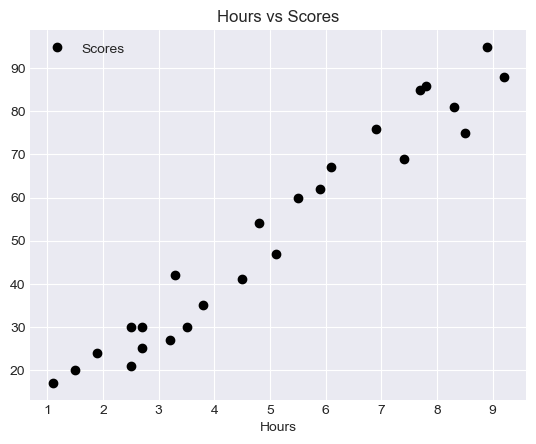

In [30]:
# Plotting a scatter plot of 'Hours' vs 'Scores' using the plot() function
df.plot(x='Hours', y='Scores', style='o', color='black')

# Adding title to the plot
plt.title('Hours vs Scores')

# Displaying the plot
plt.show()


Conclusion:
The scatter plot above shows a positive linear correlation between the hours of study and the achieved scores. As the study hours increase, there is a corresponding rise in the scores.

## **Preparing the data**
* Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [31]:
# Extracting feature (input) and target (output) variables from the DataFrame
x = df.iloc[:, :-1].values  # Feature variable 'Hours' (independent variable)
y = df.iloc[:, 1].values    # Target variable 'Scores' (dependent variable)

In [32]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [33]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## **Training the model using linear regressor**

In [34]:
# Importing necessary libraries for regression modeling
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression    # For linear regression modeling

In [35]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

# Creating a Linear Regression model
regressor = LinearRegression()

# Fitting the model with the training data
regressor.fit(x_train.reshape(-1, 1), y_train)


LinearRegression()

## **Plotting the line of regression**

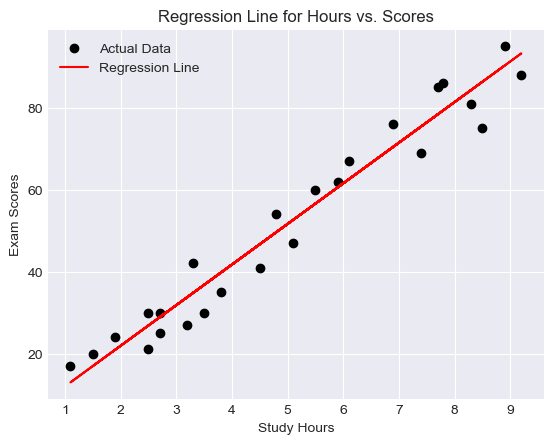

In [23]:
# Calculating the regression line
regression_line = regressor.coef_ * x + regressor.intercept_

# Plotting the scatter plot and regression line
plt.scatter(x, y, color='black', label='Actual Data')
plt.plot(x, regression_line, color='red', label='Regression Line')

# Adding title and labels
plt.title("Regression Line for Hours vs. Scores")
plt.xlabel('Study Hours')
plt.ylabel("Exam Scores")

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()


Observations: In the depicted scatter plot, the black dots correspond to the observed scores, while the red line illustrates the model's predictions. The close agreement between the actual data points and the regression line serves as validation for the model's efficacy.

## **Predictions**


In [36]:
# Displaying the testing set (x_test)
print(x_test)

# Making predictions using the trained model on the testing set
y_pred = regressor.predict(x_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]]


## **Comparing Actual Scores and Predicted Scores**

In [37]:
# Creating a DataFrame to compare actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [38]:
print(df)

   Actual  Predicted
0      20  16.927148
1      27  33.788269
2      69  75.445158
3      30  26.845455


In [39]:
# Displaying the testing score of the trained model
print("Testing score:", regressor.score(x_test, y_test))

Testing score: 0.926752749895275


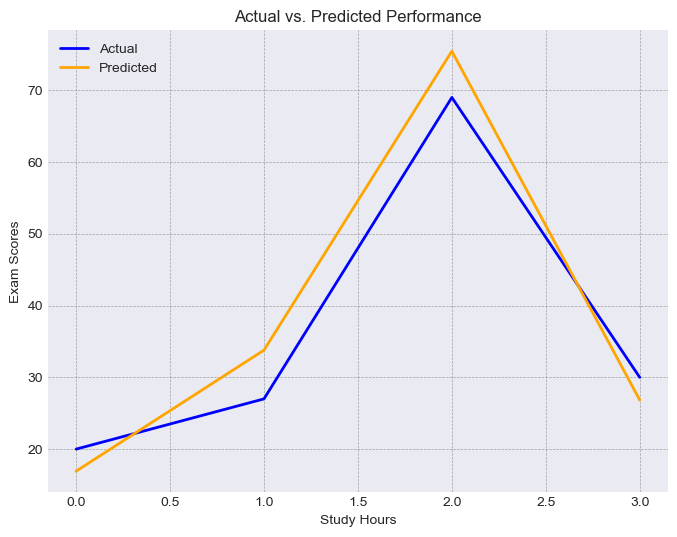

In [21]:
# Plotting the data
df.plot(kind='line', figsize=(8, 6), color=['blue', 'orange'], linewidth=2)

# Adjusting grid lines
plt.grid(axis='both', linestyle='--', linewidth='0.5', color='gray', alpha=0.7)

# Adding a touch of elegance
plt.title("Actual vs. Predicted Performance")
plt.xlabel('Study Hours')
plt.ylabel("Exam Scores")
plt.legend(["Actual", "Predicted"], loc='upper left')

# Displaying the plot
plt.show()


In [22]:
# Input values
hours = 9.25
test_hours = np.array([hours]).reshape(-1, 1)

# Making predictions
predicted_score = regressor.predict(test_hours)[0]

# Displaying the results
print(f"Number of Study Hours: {hours}")
print(f"Predicted Exam Score: {predicted_score:.2f}")


Number of Study Hours: 9.25
Predicted Exam Score: 93.79


## **The predicted score for a student who studies 9.25 hours/day is approximately 93.79.**
